# Advanced Python for Data Science
### DS-GA-3001.001/.002/.003

### Homework Assignment 04
### Due date: 03/08/2021, 4:00PM
### Student's Name: WenxinZhang
### Student's e-mail: wz2164@nyu.edu

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "spring2021_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
%load_ext line_profiler

---

### The original code description: 

** TO BE POPULATED **

** EXPLAIN THE SOLUTION ** 

---


In [3]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    x_y_coo_lst = list(zip(np.random.uniform(0, 1, n), np.random.uniform(0, 1, n))) # construct n points within the unit square
    x_y_coo_lst = list(map(lambda x: np.array(x), x_y_coo_lst)) # represent each point's coordinate using array
    vector_lst = [(-1, 0), (1, 0), (0, -1), (0, 1)] # move in one of the four directions
    min_dist_i = []
    for iteration_i in range(T):
        dist_lst = [] 
        x_y_coo_lst = list(map(lambda x: x+np.random.uniform(0, delta)*np.array(vector_lst[np.random.randint(0, 4)]), x_y_coo_lst))
        # make sure the n points are still in the unit square
        for point in x_y_coo_lst:
            for index in range(2):
                if point[index] > 1:
                    point[index] = 1
                if point[index] < 0:
                    point[index] = 0
        # compute the distances between these n points
        for index_i in combinations(range(n), 2):
            dist_lst.append(np.linalg.norm(x_y_coo_lst[index_i[0]]-x_y_coo_lst[index_i[1]]))
        min_dist_i.append(min(dist_lst))
    return min_dist_i

In [4]:
n = 1500
delta = 1.0 / n
T = 20

In [5]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T) # 275 seconds

len: 20


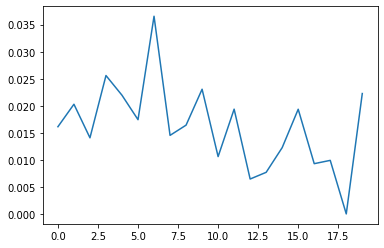

In [6]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

---

### The optimized code description: 

** TO BE POPULATED **

** EXPLAIN THE SOLUTION ** 

---


In [7]:
def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    x_y_coor_arr = np.random.random(2*n).reshape(-1, 2) # construct a n*2 array representing the coordinates of the n points
    min_dist_lst = []
    for iteration_i in range(T):
        min_dist = np.sqrt(2)
        for point_i, point_j in combinations(x_y_coor_arr, 2): # combine each two points to compute their distance
            min_dist = min(((point_i[0]-point_j[0])**2 + (point_i[1]-point_j[1])**2)**0.5, min_dist)
        min_dist_lst.append(min_dist)
        for row_i in range(n):
            delta_ = random.uniform(0, delta)
            temp_i = x_y_coor_arr[row_i] + random.choice([(-delta_,0),(delta_,0),(0,-delta_),(0,delta_)]) 
            # make sure the n points are still in the unit square
            x_y_coor_arr[row_i][0] = min(max(0, temp_i[0]), 1)
            x_y_coor_arr[row_i][1] = min(max(0, temp_i[1]), 1)
            
    return min_dist_lst

In [8]:
n = 1500
delta = 1.0 / n
T = 40

In [9]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T) # 125 seconds

len: 40


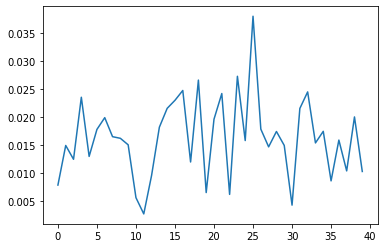

In [10]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()